In [1]:
import pandas as pd
from collections import Counter
from functional import get_data, process, clean_df, add_counts, analyze_most_different 

## how gender clues are implied within the contents recommended by Spotify’s recommender systems in terms of the graphical user interface, and the presentation of playlists on the home screen, based on personalized recommendation patterns
</br>

### How are gender ideologies implied within the recommended playlists and their organization on Spotify

### Preparation:
Reading files</br>
Cleaning data

In [2]:
full_male, full_female = get_data()

In [3]:
# Creating subsets from the data to work with
male, female = process(full_male), process(full_female)

In [4]:
len(male), len(female)

(4242, 5014)

In [5]:
# Clean all data by removing trailing whitespaces and lowercasing all letters
female = add_counts(clean_df(female.copy()))
male = add_counts(clean_df(male.copy()))

Now that data is clean, textual analysis can begin

### Simple stats, which are the most common playlists each user received?

In [6]:
len(male[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False))

552

In [7]:
#x = male[female['type'] == 'playlist']
#x[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False).to_excel('fem.xlsx')
plotdf['playlist count'].max()

NameError: name 'plotdf' is not defined

251
3775


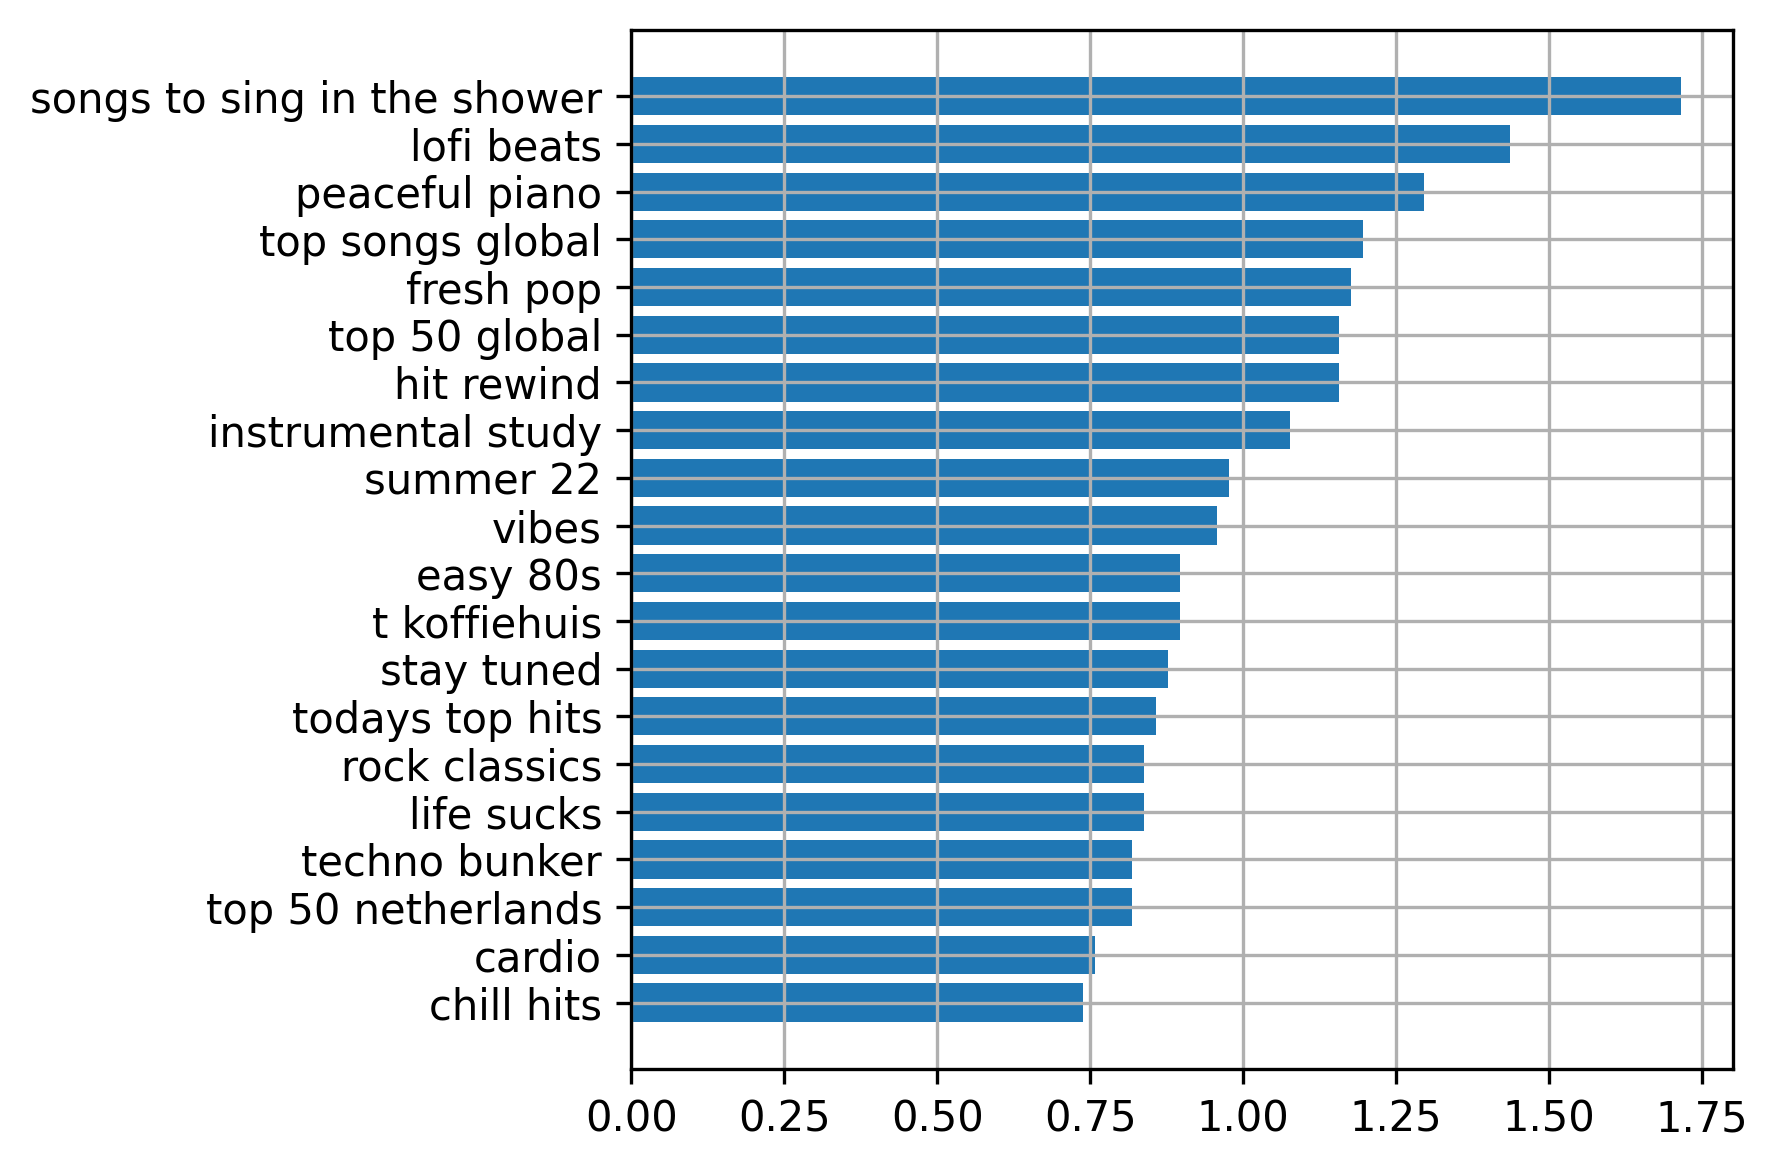

In [8]:
import matplotlib.pyplot as plt

plotdf = female[female['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)#.head(20)

print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf=plotdf.head(20)

plt.figure(dpi=300)
plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(female))*100)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.savefig('data/femaletop20.png')
plt.show()

356
3429


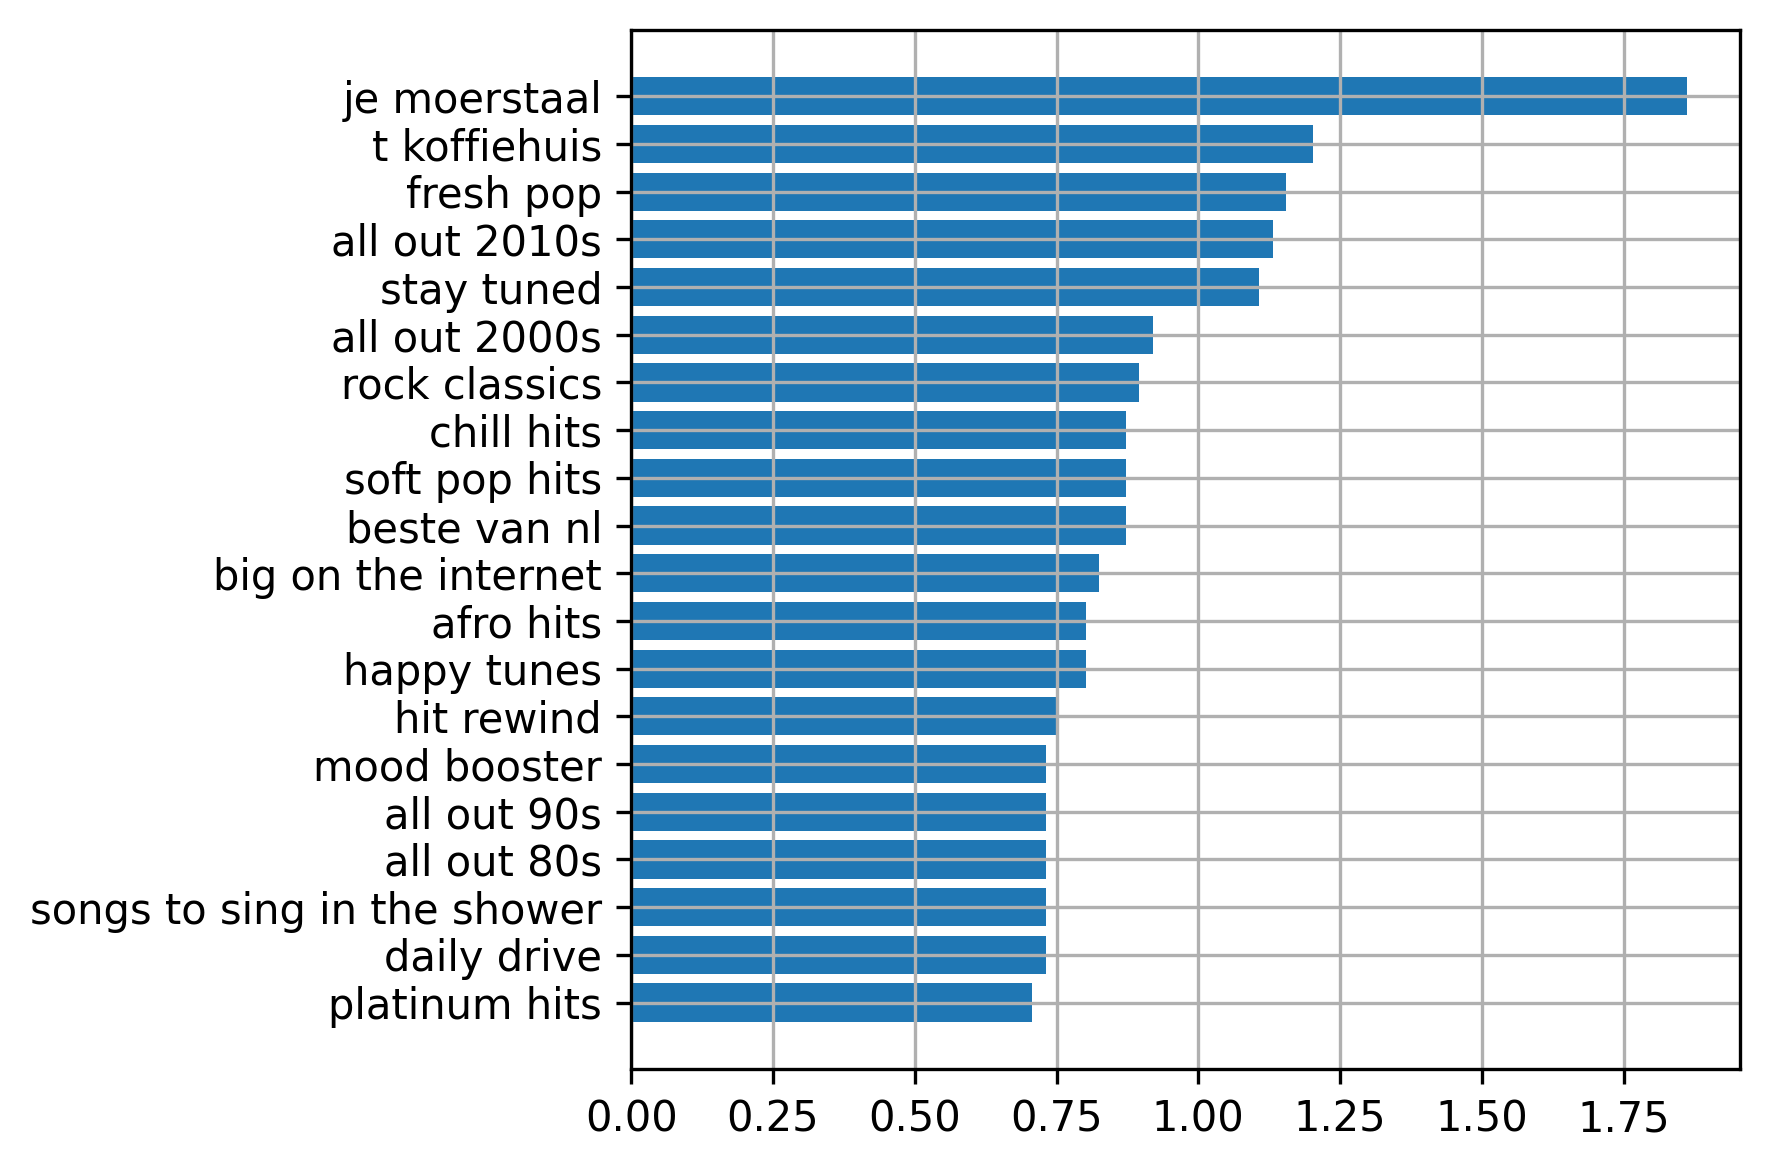

In [9]:
plotdf = male[male['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)
print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf = plotdf.head(20)

plt.figure(dpi=300)
plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(male))*100)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

In [159]:
female['playlist count']

0       60
1       32
2       58
3       41
4       33
        ..
5009    31
5010    33
5011    32
5012    14
5013    28
Name: playlist count, Length: 5014, dtype: int64

In [183]:
male

,day,time,hub name,playlist name,type,playlist count,hub count
0,2022-04-14,10:00:00,to get you started,taylor swift mix,playlist,5,3
1,2022-04-14,10:00:00,to get you started,bad bunny mix,playlist,5,3
2,2022-04-14,10:00:00,to get you started,bts mix,playlist,5,3
3,2022-04-14,10:00:00,try something else,hot hits,playlist,2,9
4,2022-04-14,10:00:00,try something else,top 50 netherlands,playlist,2,9
...,...,...,...,...,...,...,...
4242,2022-04-20,22:00:00,discover more from pink floyd,soft rock,playlist,20,79
4243,2022-04-20,22:00:00,discover more from pink floyd,pure rock roll,playlist,12,79
4244,2022-04-20,22:00:00,discover more from pink floyd,classic acoustic,playlist,12,79
4245,2022-04-20,22:00:00,discover more from pink floyd,the wall,album,3,79


### Dutch Playlists

In [217]:
dutchm = ['je moerstaal', 'beste van nl', 'woordenschat', 'made in nl', 'beste van woordenschat', '80s beste nltalig', '60s beste nltalig', '70s beste nltalig', 'de jeugd', '00s beste nltalig', '90s beste nltalig', 'de hits uit 2016', 'top 50 netherlands', 'de hits uit 2010', 'de hits uit 2012', 'de hits uit 2019', 'de hits uit 2014', '10s beste nltalig', 'karakter', 'new music friday nl', '10s allerbeste', 'de hits uit 2017', 'equal netherlands', 'de hits uit 2015', 'de hits uit 2013', 'viral 50 netherlands', 'top songs netherlands']
dutchf = ['top songs netherlands', 'top 50 netherlands', 'beste van nl', 'viral 50 netherlands', 'je moerstaal', 'viral hits nl', 'new music friday nl', 'hot hits nl', 'woordenschat', 'zomerhits 20102020', '10s allerbeste', 'de hits uit 2016', 'de hits uit 2019', 'beste van woordenschat', '10s beste nltalig', 'de hits uit 2018']


femc=0
for x in dutchf:
    femc += int(female['playlist count'].loc[female['playlist name'] == x].unique())

mamc=0
for y in dutchm:
    #display(male.loc[male['playlist name'] == y].drop_duplicates())
    mamc += int(male['playlist count'].loc[male['playlist name'] == y].unique())

# Amount of dutch playlists recommended out of all playlists ever recommended
(mamc/len(male.loc[male['type']=='playlist']))*100, (femc/len(female.loc[female['type']=='playlist']))*100


(7.803724504877328, 8.876374363100027)

In [218]:
# Amount of dutch playlists out of all playlists
(len(dutchm)/len(male['playlist name'].loc[male['type']=='playlist'].unique()))*100, (len(dutchf)/len(female['playlist name'].loc[female['type']=='playlist'].unique()))*100

(7.563025210084033, 6.374501992031872)

In [188]:
mf = [(mamc/len(male))*100, (femc/len(female))*100]

plt.figure(dpi=300)
plt.barh(['male', 'female'], mf)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

NameError: name 'mamc' is not defined

### Similarities:
Find which playlists both users got recommended

In [10]:
# Check which playlists both users have in common
similar_playlists = male[male['playlist name'].isin(female['playlist name'])]
similar_playlists = similar_playlists[similar_playlists.type == 'playlist']
#similar_playlists

In [11]:
# Which playlists only one of both users gets recommended to
diff = pd.concat([male[~male['playlist name'].isin(female['playlist name'])], 
    female[~female['playlist name'].isin(male['playlist name'])]])
diff = diff[diff.type == 'playlist']

### Finding which are the most appearing playlists only one of both users were recommended

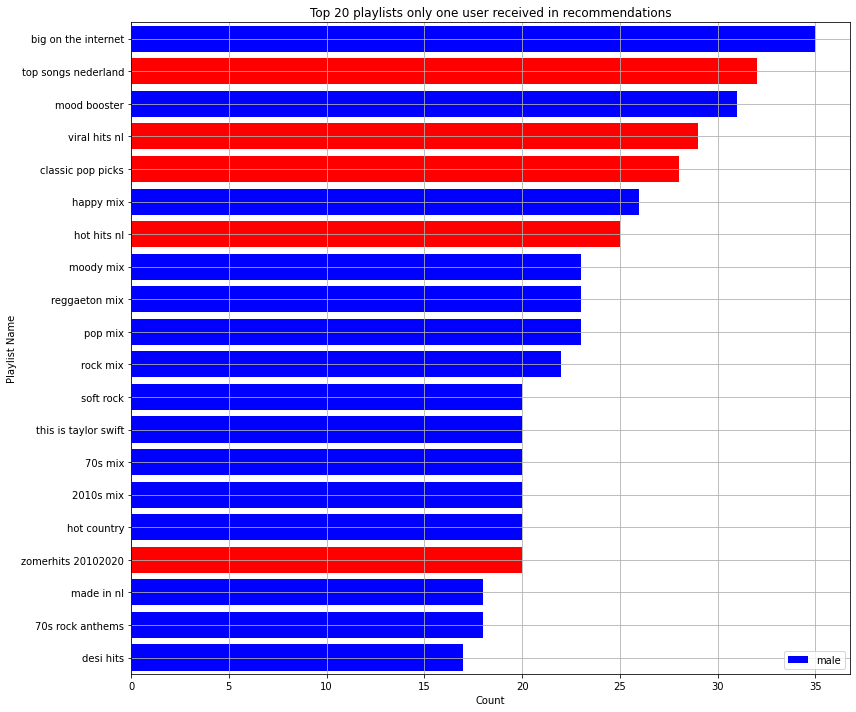

In [12]:
most_different = dict(Counter(diff['playlist name']).most_common(20))
male_unique = male['playlist name'].unique()

analyze_most_different(most_different, male_unique, feature=False)

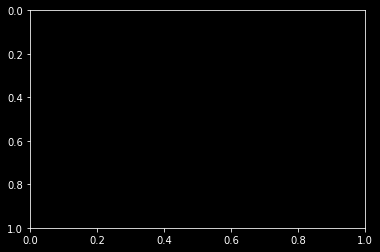

In [69]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

playlists=list(most_different.keys())
counts = list(most_different.values())
color = ['blue' if x in male_unique else 'red' for x in most_different]

source=ColumnDataSource(dict(playlist=playlists,count=counts, color=color))

p = figure(y_range=playlists, width=400, height=400)

p.hbar(y='playlist', right='count', left=0, height=0.4, color='color', source=source)

plt.gca().invert_yaxis()
       
show(p)

In [122]:
m_playlist = male[male.type == 'playlist']
f_playlist = female[female.type == 'playlist']

In [123]:
'happy mix' in female['playlist name'].unique()

False

In [124]:
# Looking for the most common recommended playlists per user
m = dict(Counter(m_playlist['playlist name']).most_common())
mdf = pd.DataFrame({'male': m.keys(), 'count': m.values()})

f = dict(Counter(f_playlist['playlist name']).most_common())
fdf = pd.DataFrame({'female': f.keys(), 'count': f.values()})

#display(mdf.head(20), fdf.head(20))

In [125]:
simm = dict()

p = similar_playlists['playlist name'].astype(str)
for key, value in m.items():
    if key in p:
        simm[key] = value
        
len(simm)


0

In [ ]:
# https://stackoverflow.com/questions/21319929/how-to-determine-whether-a-pandas-column-contains-a-particular-value
found = df[df['Column'].str.contains('Text_to_search')]
print(found.count())

### Looking for the difference between how often male vs female user received certain playlists

In [13]:
most_common_playlists = {
    'male': dict(Counter(m_playlist['playlist name']).most_common()), 
    'female': dict(Counter(f_playlist['playlist name']).most_common())
}

# Fill all playlists only one user gets recommended
new = pd.DataFrame(most_common_playlists).fillna(0)

# Get difference
new['diff'] = abs(new['male'] - new['female'])

# Sort
new.sort_values(by = 'diff', ascending=False, inplace=True)
new.head(60)

NameError: name 'm_playlist' is not defined

### Differences in playlist recommendations between both users

In [127]:
# Looking for top playlists both users were recommended that the other user was not
male_count = dict(Counter(m_playlist['playlist name'][~m_playlist['playlist name'].isin(f_playlist['playlist name'])]).most_common())
female_count = dict(Counter(f_playlist['playlist name'][~f_playlist['playlist name'].isin(m_playlist['playlist name'])]).most_common())

display(
pd.DataFrame({'male': male_count.keys(), 'count' : male_count.values()}).head(20),
pd.DataFrame({'female': female_count.keys(), 'count' : female_count.values()}).head(20)
)

,male,count
0,big on the internet,35
1,mood booster,31
2,happy mix,26
3,moody mix,23
4,reggaeton mix,23
5,pop mix,23
6,rock mix,22
7,soft rock,20
8,this is taylor swift,20
9,70s mix,20


,female,count
0,top songs nederland,32
1,viral hits nl,29
2,classic pop picks,28
3,hot hits nl,25
4,zomerhits 20102020,20
5,homework motivation,15
6,singled out,15
7,all new all now,15
8,sing along kpop,14
9,top hits of 2018,14


Tagging times after morning, afternoon and evening

In [80]:
# copy = male.copy()
# copy['time'] = copy.time.astype(str).apply(lambda x: int(x[:2]))

# # Translate the times to dayphases
# for i, time in copy.time.iteritems():
#     if time < 12:
#         copy.iloc[i] = 'morning'
#     elif time >=12<19:
#         copy.iloc[i] = 'afternoon'
#     else:
#         copy.iloc[i] = 'evening'

        

In [ ]:
#male[copy['time'] == 'morning']

In [133]:
# Calculating how many times the woman received dinner hubs
Counter(female['playlist name'][female['hub name'] == 'dinner'])

Counter({'dinner with friends': 6,
         'dinner music': 6,
         'feel good dinner': 6,
         'kitchen swagger': 6,
         'latin dinner': 6,
         'jazzy dinner': 6,
         'bossa nova dinner': 6,
         'the perfect italian dinner': 5,
         'dinner lounge': 6,
         'diner entre amis': 6})

In [106]:
full_female[full_female['hub name'] == 'Dinner'].groupby(['playlist name'])['day','playlist name'].apply(display)

/var/folders/l4/sh91w5z5601c5_zm643js55c0000gn/T/ipykernel_12190/934074971.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_female[full_female['hub name'] == 'Dinner'].groupby(['playlist name'])['day','playlist name'].apply(display)


,day,playlist name
1093,2022-04-15,Bossa Nova Dinner
1820,2022-04-16,Bossa Nova Dinner
2590,2022-04-17,Bossa Nova Dinner
3234,2022-04-18,Bossa Nova Dinner
4617,2022-04-20,Bossa Nova Dinner


,day,playlist name
1095,2022-04-15,Dinner Lounge
1821,2022-04-16,Dinner Lounge
2593,2022-04-17,Dinner Lounge
3236,2022-04-18,Dinner Lounge
4619,2022-04-20,Dinner Lounge


,day,playlist name
1088,2022-04-15,Dinner Music
1815,2022-04-16,Dinner Music
2585,2022-04-17,Dinner Music
3228,2022-04-18,Dinner Music
4611,2022-04-20,Dinner Music


,day,playlist name
1096,2022-04-15,Dinner entre amis
1822,2022-04-16,Dinner entre amis
2592,2022-04-17,Dinner entre amis
3235,2022-04-18,Dinner entre amis
4618,2022-04-20,Dinner entre amis


,day,playlist name
1087,2022-04-15,Dinner with Friends
1814,2022-04-16,Dinner with Friends
2584,2022-04-17,Dinner with Friends
3227,2022-04-18,Dinner with Friends
4610,2022-04-20,Dinner with Friends


,day,playlist name
1089,2022-04-15,Feel Good Dinner
1817,2022-04-16,Feel Good Dinner
2586,2022-04-17,Feel Good Dinner
3229,2022-04-18,Feel Good Dinner
4612,2022-04-20,Feel Good Dinner


,day,playlist name
1092,2022-04-15,Jazzy Dinner
1818,2022-04-16,Jazzy Dinner
2588,2022-04-17,Jazzy Dinner
3232,2022-04-18,Jazzy Dinner
4615,2022-04-20,Jazzy Dinner


,day,playlist name
1090,2022-04-15,Kitchen Swagger
1816,2022-04-16,Kitchen Swagger
2587,2022-04-17,Kitchen Swagger
3230,2022-04-18,Kitchen Swagger
4613,2022-04-20,Kitchen Swagger


,day,playlist name
1091,2022-04-15,Latin Dinner
1819,2022-04-16,Latin Dinner
2589,2022-04-17,Latin Dinner
3231,2022-04-18,Latin Dinner
4614,2022-04-20,Latin Dinner


,day,playlist name
1094,2022-04-15,The Perfect Italian Dinner
2591,2022-04-17,The Perfect Italian Dinner
3233,2022-04-18,The Perfect Italian Dinner
4616,2022-04-20,The Perfect Italian Dinner


""


In [ ]:
# Counting workout playlists
display(pd.DataFrame(Counter(female['playlist name'][female['hub name'] == 'workout']).most_common()))
display(pd.DataFrame(Counter(male['playlist name'][male['hub name'] == 'workout']).most_common()))

In [ ]:
print(dict(Counter(male['playlist name'][male['hub name'] == 'mood']).most_common()).keys(),'\n',
dict(Counter(female['playlist name'][female['hub name'] == 'mood']).most_common()).keys())

Differences between how often female vs male received lo-fi beats and life sucks

In [ ]:
print(len(male[male['playlist name'] =='life sucks']), len(female[female['playlist name'] =='life sucks']))
print(len(male[male['playlist name'] =='lofi beats']), len(female[female['playlist name'] =='lofi beats']))

Checking for hub names hinting towards sentiment playlists, ignoring 'more like' or similar playlists as they are targeted towards music discovery for artists, similar playlists or algorithmically generated, sentiment neutral playlists

In [ ]:
female_hubs = list(f_playlist['hub name'])
female_hubs = [e for e in female_hubs if not e.startswith('more like') and not e.startswith('recommended')]
set(female_hubs)

In [ ]:
male_hubs = list(m_playlist['hub name'])
male_hubs = [e for e in male_hubs 
if not e.startswith('more') and 
not e.startswith('recommended') and 
not e.startswith('for fans') and 
not e.startswith('discover') and
not e.endswith('name') and
not e.endswith('albums') and
not e.endswith('charts') and
not e.endswith('artists') and

# no personalized playlists
'you' not in e]

Counter(male_hubs).most_common()

Activity or mood related playlists extracted from here are
'chill,', 'dinner,', 'instrumental,', 'mood,', 'party,', 'singalong,', 'throwback,', 'workout'

In [ ]:
# looking for mood playlists
Counter(f_playlist['playlist name'][f_playlist['hub name'].isin(['mood','vibes'])]).most_common()

Checking how often the user was recommended certain mood playlists

In [ ]:
f_playlist['day'][f_playlist['playlist name'] == 'life sucks']
set(f_playlist['day'][f_playlist['playlist name'] == 'songs to sing in the shower'])

In [ ]:
# Male mood playlists
Counter(male['playlist name'][male['hub name'].isin(['mood','vibes','sad songs','sad vibes','happy'])]).most_common()

### Workout playlists

In [76]:
pd.DataFrame(Counter(male['playlist name'][male['hub name'].isin(['workout'])]).most_common())

,0,1
0,motivation mix,10
1,fun run,10
2,power hour,10
3,run this town,10
4,top hits workout,9
5,beast mode,9
6,power workout,9
7,cardio,9
8,workout,8
9,fast pop run,6


In [77]:
pd.DataFrame(Counter(female['playlist name'][female['hub name'].isin(['workout'])]).most_common())

,0,1
0,power hour,32
1,top hits workout,31
2,beast mode,31
3,fun run,31
4,motivation mix,31
5,workout,31
6,cardio,31
7,run this town,31
8,power workout,29
9,yoga meditation,15


# Hubs

In [14]:
female_hubs = female[['day', 'time', 'hub name']]
female_hubs = female_hubs.drop_duplicates()
female_hubs = female_hubs.reset_index().drop('index', axis=1)
female_hubs['hub count'] = female_hubs.groupby('hub name')['hub name'].transform('count')
female_hubs['hub percent'] = pd.to_numeric((female_hubs['hub count']/len(female_hubs))*100)

How many hubs did they receive?

In [15]:
print(len(female_hubs['hub name'].unique()))
display(female_hubs['hub name'].unique())

33


array(['featured charts', 'throwback', 'chill', 'singalong', 'workout',
       'todays biggest hits', 'recommended for today', 'mood',
       'fresh new music', 'instrumental', 'to get you started',
       'try something else', 'more like kris kross amsterdam',
       'more like antoon', 'suggested artists', 'more like harry styles',
       'more like hot hits nl', 'recommended for you today',
       'more like todays top hits', 'more like jack harlow',
       'more like camila cabello', 'more like ed sheeran', 'party',
       'dinner', 'more like charlie puth', 'more like pop rising',
       'more like imagine dragons', 'more like jax jones',
       'more like latto', 'made for female name', 'artists you like',
       'recommended radio', 'more like coldplay'], dtype=object)

In [16]:
labels = 'other', 'generated', 'based on previous listening', 'more like playlists', 'recommended playlists', 'more like artists'
sizes = 'x'


others = ['throwback', 'chill', 'singalong', 'workout','mood', 'party', 'dinner']

genres = ['instrumental']

for_you = ['made for female name', 'artists you like', 'recommended radio', 'try something else', 'to get you started']

trends = ['featured charts', 'fresh new music', 'todays biggest hits']

more_like_playlists = ['more like todays top hits', 'more like hot hits nl', 'more like pop rising']

recommended = ['recommended for today', 'recommended for you today', 'suggested artists']

more_like_artists = ['more like imagine dragons', 'more like jax jones', 'more like latto', 'more like charlie puth', 'more like harry styles', 'more like kris kross amsterdam', 'more like jack harlow', 'more like antoon', 'more like camila cabello', 'more like ed sheeran', 'more like coldplay']

In [17]:
plot = dict()

l = [others, genres, for_you, trends, more_like_artists, recommended, more_like_playlists]
m = ['moods and activities', 'genres', 'for you', 'trends', 'more like other artists', 'recommended', 'more like other playlists']

for num, x in enumerate(l):
    plot[m[num]] = 0
    for y in x:
        idx = female_hubs[female_hubs['hub name'] == y].index
        plot[m[num]] += female_hubs.iloc[idx[0]]['hub count']
    plot[m[num]] = plot[m[num]]/562*100

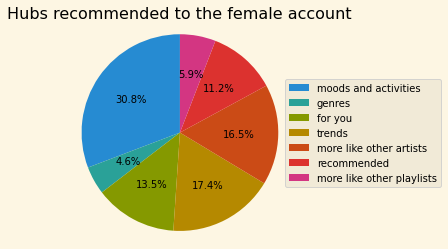

In [34]:
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['moods and activities', 'genres', 'for you', 'trends', 'more like other artists', 'recommended', 'more like other playlists']#list(plot.keys())
sizes = list(plot.values())
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


#plt.figure(dpi=300)

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the female account', loc='center')
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops={'color':"black"}) #explode=explode
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(0.8, 0, 0, 1), labelcolor='k')


plt.savefig('data/female_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

In [134]:
female_hubs[['hub name', 'hub count', 'hub percent']].sort_values(by='hub percent', ascending=False).drop_duplicates().head(20)

,hub name,hub count,hub percent
561,singalong,33,5.871886
139,chill,33,5.871886
361,workout,33,5.871886
359,throwback,33,5.871886
355,fresh new music,33,5.871886
149,todays biggest hits,33,5.871886
544,try something else,32,5.693950
396,featured charts,32,5.693950
340,recommended for you today,31,5.516014
180,suggested artists,31,5.516014


In [35]:
male_hubs = male[['day', 'time', 'hub name']]

# Drop amount of times each hub has been recommended and instead calculate each hub's appearance once per daytime it appears
male_hubs = male_hubs.drop_duplicates()
male_hubs = male_hubs.reset_index().drop('index', axis=1)
male_hubs['hub count'] = male_hubs.groupby('hub name')['hub name'].transform('count')
male_hubs['hub percent'] = pd.to_numeric((male_hubs['hub count']/len(male_hubs))*100)

In [46]:
labels = ['moods and activities', 'genres', 'for you', 'trends', 'other', 'recommended', 'more like other artists']
sizes = 'x'

others = ['celebrating 5 years of american teen','current hits and the 10s','playlists celebrating women']

moods_and_activities = ['throwback', 'mood', 'workout', 'singalong', 'happy','sad love','party', 'sad songs', 'love','chill', 'dream playlist rotation',]

genres = ['rock', 'hip hop','pop', 'dutch language pop', 'instrumental','the best dance playlists', 'women of pop', 'global cultures on the main stage',]

for_you = ['your favorite artists', 'recommended radio', 'made for male name', 'try something else', 'uniquely yours',  'your top mixes', 'more of what you like', 'to get you started', 'discover something new',]

trends = ['featured charts', 'popular new releases', 'popular artists', 'trending now', 'popular albums','blijf op de hoogte', 'todays biggest hits', 'fresh new music','new and rising artists', 'trending albums for you', 'album picks', ]

recommended = ['recommended for today', 'recommended for you today', 'suggested artists','based on your recent listening', ]

more_like_artists = ['more like taylor swift', 'more like bad bunny', 'more like bts', 'more like harry styles', 'more like jack harlow', 'more like charlie puth', 'more like queen', 'more like 5 seconds of summer', 'more like lauren spencersmith', 'more like imagine dragons', 'discover more from pink floyd', 'more like justin bieber', 'weeknd vibes','for fans of taylor swift', 'for fans of bts', 'for fans of bad bunny','best of artists']

In [67]:
type(female)

pandas.core.frame.DataFrame

In [78]:
female.to_csv('data/femalesem.csv', sep=';')

In [76]:
nights = female.copy()
nights['time'] = female['time'].astype(str).apply(lambda x: int(x[:2]))
for i, time in nights.time.iteritems():
    if time < 12:
        nights.iloc[i] = 'morning'
    elif time >=12<19:
        nights.iloc[i] = 'afternoon'
    else:
        nights.iloc[i] = 'evening'

#nights = female.replace({'time':t})
#nights = female[female['time'] < 21 > 18]
nights[nights['hub name']].drop_duplicates()

KeyError: "None of [Index(['morning', 'morning', 'morning', 'morning', 'morning', 'morning',\n       'morning', 'morning', 'morning', 'morning',\n       ...\n       'afternoon', 'afternoon', 'afternoon', 'afternoon', 'afternoon',\n       'afternoon', 'afternoon', 'afternoon', 'afternoon', 'afternoon'],\n      dtype='object', length=5014)] are in the [columns]"

In [79]:
male_hubs[['hub name', 'hub count', 'hub percent']].sort_values(by='hub percent', ascending=False).drop_duplicates().head(40)

,hub name,hub count,hub percent
460,throwback,31,5.938697
263,discover something new,30,5.747126
262,blijf op de hoogte,30,5.747126
424,made for male name,28,5.363985
229,your top mixes,27,5.172414
177,fresh new music,19,3.639847
160,recommended radio,17,3.256705
325,global cultures on the main stage,17,3.256705
267,new and rising artists,16,3.065134
481,dream playlist rotation,15,2.873563


In [54]:
male_hubs[male_hubs['hub name'] == 'fresh new music']

,day,time,hub name,hub count,hub percent
12,2022-04-14,10:00:00,fresh new music,19,3.639847
68,2022-04-15,10:00:00,fresh new music,19,3.639847
85,2022-04-15,19:00:00,fresh new music,19,3.639847
102,2022-04-15,22:00:00,fresh new music,19,3.639847
121,2022-04-16,09:40:00,fresh new music,19,3.639847
140,2022-04-16,13:00:00,fresh new music,19,3.639847
158,2022-04-16,16:00:00,fresh new music,19,3.639847
177,2022-04-16,19:00:00,fresh new music,19,3.639847
200,2022-04-16,22:00:00,fresh new music,19,3.639847
212,2022-04-17,09:40:00,fresh new music,19,3.639847


In [47]:
plot = dict()

l = [moods_and_activities, genres, for_you, trends, others, recommended, more_like_artists]

for num, x in enumerate(l):
    plot[labels[num]] = 0
    for y in x:
        idx = male_hubs[male_hubs['hub name'] == y].index
        plot[labels[num]] += male_hubs.iloc[idx[0]]['hub count']
    plot[labels[num]] = plot[labels[num]]/522*100

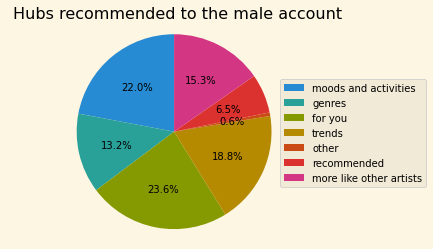

In [48]:
plt.style.use('Solarize_Light2')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = list(plot.values())

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the male account', loc='right')
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops={'color':"black"}) #explode=explode
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(0.8, 0, 0, 1), labelcolor='k')


plt.savefig('data/male_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

In [84]:
display(female[female['hub name'] == 'women of pop'])

,day,time,hub name,playlist name,type,playlist count,hub count


In [83]:
display(male[male['hub name'] == 'playlists celebrating women'], male[male['hub name'] == 'women of pop'])

,day,time,hub name,playlist name,type,playlist count,hub count
4167,2022-04-20,22:00:00,playlists celebrating women,feelin myself,playlist,10,10
4168,2022-04-20,22:00:00,playlists celebrating women,the slaylist,playlist,1,10
4169,2022-04-20,22:00:00,playlists celebrating women,equal,playlist,1,10
4170,2022-04-20,22:00:00,playlists celebrating women,equal belgium,playlist,1,10
4171,2022-04-20,22:00:00,playlists celebrating women,dope af,playlist,1,10
4172,2022-04-20,22:00:00,playlists celebrating women,created by women,playlist,1,10
4173,2022-04-20,22:00:00,playlists celebrating women,equal netherlands,playlist,1,10
4174,2022-04-20,22:00:00,playlists celebrating women,fierce femmes,playlist,1,10
4175,2022-04-20,22:00:00,playlists celebrating women,iconic arabic women,playlist,1,10
4176,2022-04-20,22:00:00,playlists celebrating women,badass,playlist,1,10


,day,time,hub name,playlist name,type,playlist count,hub count
4214,2022-04-20,22:00:00,women of pop,women of pop,playlist,7,10
4215,2022-04-20,22:00:00,women of pop,this is cyndi lauper,playlist,1,10
4216,2022-04-20,22:00:00,women of pop,this is adele,playlist,1,10
4217,2022-04-20,22:00:00,women of pop,this is ariana grande,playlist,1,10
4218,2022-04-20,22:00:00,women of pop,this is dua lipa,playlist,1,10
4219,2022-04-20,22:00:00,women of pop,this is ava max,playlist,1,10
4220,2022-04-20,22:00:00,women of pop,this is miley cyrus,playlist,1,10
4221,2022-04-20,22:00:00,women of pop,this is rita ora,playlist,1,10
4222,2022-04-20,22:00:00,women of pop,this is little mix,playlist,1,10
4223,2022-04-20,22:00:00,women of pop,this is katy perry,playlist,1,10
